# Colour test

**Author**: Steven R. Schofield  
**Created**: November, 2024

In [2]:
# Define path where to find the module. This allows for a different path depending on where the code is running (my mac or the cluster)
import os
module_path = next((p for p in [
    '/Users/steven/academic-iCloud/Python/modules',
    '/hpc/srs/Python/modules'
] if os.path.exists(p)), None)

data_path = module_path +'/SRSML24/example_data/jpg'
img_name ='default_2014Aug05-111518_STM-STM_Spectroscopy--58_2_FU.jpg'

In [3]:
# # Ensure modules are reloaded 
%load_ext autoreload
%autoreload 2

# Import standard modules
import os, sys
import numpy as np

# Add custom module path to list
sys.path.append(module_path)

# Import custom module
import SRSML24.data_prep as dp
import SRSML24.model as m
import SRSML24.utils as ut

import tensorflow as tf
#from tensorflow.keras.optimizers.legacy import Adam 
from tensorflow.keras.optimizers import Adam

# adjust tensorflow output level
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0' # 0 default all messages, 1 warnings and errors, 2, errors, 3 fatal errors only

m.print_system_info()

start_time = dp.current_datetime()


Python version: 3.8.18 (default, Sep 11 2023, 08:17:16) 
[Clang 14.0.6 ]
TensorFlow version: 2.13.0
TensorFlow is built with CUDA: False
TensorFlow is built with ROCm: False

System: Darwin 24.1.0 (arm64)
Platform: macOS-15.1.1-arm64-arm-64bit
Processor: arm

Number of GPUs available to TensorFlow: 1
GPU Device: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

>>> Running with GPU available <<<  (macOS-15.1.1-arm64-arm-64bit)

Current time 2024-11-24 12:00:13


In [22]:
import matplotlib.pyplot as plt
from matplotlib import colormaps  # Import the new colormap module
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

In [23]:
img = ut.load_grayscale_image(data_path+'/'+img_name)

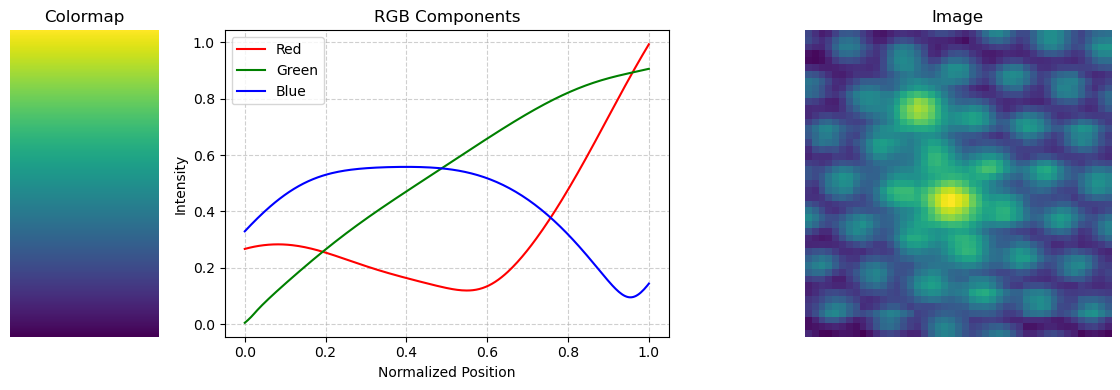

In [24]:
# Use the new colormap API
colormap = colormaps['viridis']
ut.display_colormap_and_rgb(colormap,n_colors=256, image=img)

In [ ]:
# Define custom colors
colors = ['red', 'green', 'yellow', 'blue']
colormap = ListedColormap(colors)
ut.display_colormap_and_rgb(colormap,n_colors=256, image=img)


In [ ]:
colors = {
    'red':   [(0.0, 0.0, 0.0), (0.5, 1.0, 1.0), (1.0, 1.0, 1.0)],
    'green': [(0.0, 0.0, 0.0), (0.5, 0.0, 0.0), (1.0, 1.0, 1.0)],
    'blue':  [(0.0, 0.0, 1.0), (0.5, 1.0, 1.0), (1.0, 0.0, 0.0)],
}
colormap = LinearSegmentedColormap('CustomMap', segmentdata=colors)
ut.display_colormap_and_rgb(colormap,n_colors=256, image=img)




In [ ]:
# Plot the image with all colormaps and larger title fonts
ut.plot_colormaps_image_grid(img, ncols=5, figwidth=20, title_fontsize=14)

In [ ]:
for colormapkey in plt.colormaps():
    print(colormapkey)
    colormap = colormaps[colormapkey]
    ut.display_colormap_and_rgb(colormap,n_colors=256, image=img)
